# Space X Falcon 9 First Stage Landing Prediction

## Assignment: Machine Learning Prediction

Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore, if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocker launch. In this lab, you will create a machine learning pipeline to predict if the first stage will land given the data from the preceding labs.

## Objectives

Perform exploratory Data Analysis and determine Training Labels
* Create a column for the class
* Standardize the data
* Split into training data and test data

- Find best Hyperparameter for SVM, Classification Trees and Logistic Regression
* Find the method performs best using test data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import preprocessing to standardize and allow us to split our data
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Import models
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
# This function is to plot the confusion matrix

def plot_confusion_matrix(y, y_predict):
    "This function plots the confusion matrix"
    
    cm = confusion_matrix( y, y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot = True, ax = ax); # annot = True to annotate cells
    ax.set_xlabel
    ax.set_ylabel
    ax.set_title
    ax.xaxis.set_ticklabels(['did not land', 'land'])
    ax.yaxis.set_ticklabels(['did not land', 'landed'])

## Load the data

In [3]:
data = pd.read_csv("dataset_part_2.csv")
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [4]:
data.shape

(90, 18)

In [5]:
data.columns

Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'Class'],
      dtype='object')

In [6]:
X = pd.read_csv("dataset_part_3.csv")
X.head(50)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5,6.0,3325.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
6,7.0,2296.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
7,8.0,1316.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
8,9.0,4535.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
9,10.0,4428.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [7]:
X.shape

(90, 83)

## Task 1

Create a Numpy array from the column `Class` in `data`, by applying the method `to_numpy()` then assign it to the variable `Y`, make sure the output is a Pandas series (only one bracket df['name of column']).

In [8]:
y = np.array(data['Class'])
len(y), type(y)

(90, numpy.ndarray)

## Task 2

In [9]:
# students get this
transform = preprocessing.StandardScaler()

In [10]:
transformed_X = transform.fit(X).transform(X.astype(float))
transformed_X[0:5]

array([[-1.71291154e+00, -1.94814463e-16, -6.53912840e-01,
        -1.57589457e+00, -9.73440458e-01, -1.05999788e-01,
        -1.05999788e-01, -6.54653671e-01, -1.05999788e-01,
        -5.51677284e-01,  3.44342023e+00, -1.85695338e-01,
        -3.33333333e-01, -1.05999788e-01, -2.42535625e-01,
        -4.29197538e-01,  7.97724035e-01, -5.68796459e-01,
        -4.10890702e-01, -4.10890702e-01, -1.50755672e-01,
        -7.97724035e-01, -1.50755672e-01, -3.92232270e-01,
         9.43398113e+00, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.50755672e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.50755672e-01, -1.05999788e-0

In [11]:
len(X), len(transformed_X)

(90, 90)

We split the data into training and testing data using the function `train_test_split`. The training data is dividied into validation data, a second set used for training data; then the models are trained and hyperparameters are selected using the function `GridSearchCV`.

## Task 3

Use the function train_test_split to split the data transformed_X and y into training and test data. Set the parameter test_size to 0.2 and random_state to 2. The training data and test data should be assigned to the following labels.

`X_train, X_test, y_train, y_test`

In [12]:
X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                    y,
                                                    test_size = (0.2),
                                                    random_state = 2)

In [13]:
len(X_train), len(X_test), len(y_train), len(y_test)

(72, 18, 72, 18)

We can see only have 18 test samples.

In [14]:
y_test.shape

(18,)

## Task 4

Create a logistic regression object then create a GridSearchCV object `logreg_cv` with cv = 10. Fit the object to find the best parameters from the dictionary `parameters`.

In [15]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [16]:
parameters = {'C': [ 0.01, 0.1, 1],
              'penalty':['l2'],
              'solver': ['lbfgs']} # l1 lasso l2 ridge

# Instantiate the model
lr = LogisticRegression()

# Set up Grid parameter
logreg_cv = GridSearchCV(lr,
                          param_grid = parameters,
                          cv = 10)

# Fit the data into the Grid
logreg_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [17]:
logreg_cv.best_params_

{'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}

We output `GridSearchCV` object for logistic regression. We display the best parameters using the data attribute `best_params_` and the accuracy on the validation data using the data attribute `best_score_`.

In [18]:
print("Tuned hyperparameters: (best parameters)" ,logreg_cv.best_params_)
print("\naccuracy:", logreg_cv.best_score_)

Tuned hyperparameters: (best parameters) {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}

accuracy: 0.8464285714285713


## Task 5

Calculate the accuracy on the test data using the method `score`:

In [19]:
#Let's do some predictions
lr_yhat = logreg_cv.predict(X_test)
lr_yhat, len(lr_yhat)

(array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64),
 18)

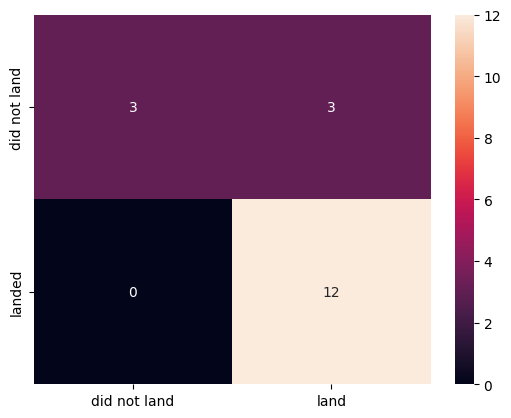

In [20]:
# Make a Confusion Matrix
plot_confusion_matrix(y_test, lr_yhat)

In [21]:
lr_acc_score = accuracy_score(y_test, lr_yhat)
lr_acc_score

0.8333333333333334

## Task 6

Create a support vector machine object then create a `GridSearchCV` object `svm_cv` with cv = 10. Fit the object to find the best parameters from the dictionary `parameters`.

In [22]:
parameters = {'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma': np.logspace(-3 , 3, 5)}

In [23]:
# Instantiate the model
svm = SVC()

# Set up Grid parameter
svm_cv = GridSearchCV(svm, 
                      param_grid = parameters,
                      cv = 10)

svm_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [24]:
svm_cv.best_params_

{'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}

In [25]:
print("Tuned hyperparameters: (best parameters)" , svm_cv.best_params_)
print("\naccuracy:", svm_cv.best_score_)

Tuned hyperparameters: (best parameters) {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}

accuracy: 0.8482142857142856


## Task 7

In [26]:
# Let's make some predictions
svm_yhat = svm_cv.predict(X_test)
svm_yhat, len(svm_yhat)

(array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64),
 18)

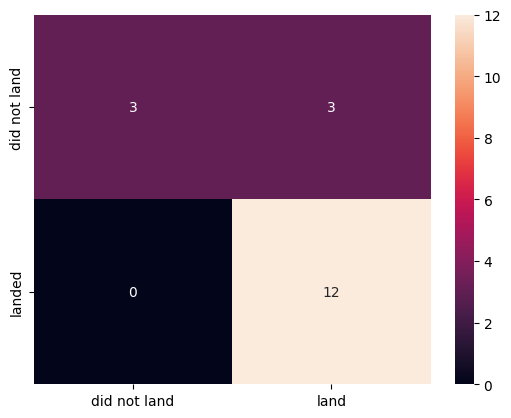

In [27]:
# Confusion Matrix
plot_confusion_matrix(y_test, svm_yhat)

In [28]:
svm_cv_acc_score = accuracy_score(y_test, svm_yhat)
svm_cv_acc_score

0.8333333333333334

## Task 8

Create a decision tree classifier object then create a `GridSearchCV` object `tree_cv` with cv = 10. Fit the object to find the best parameters from the dictionary `parameters`.

In [29]:
parameters = {'criterion': ['gini', 'entropy'],
             'splitter': ['best', 'random'],
             'max_depth':[2*n for n in range (1, 10)],
             'max_features':['auto', 'sqrt'],
             'min_samples_leaf': [1, 2, 4],
             'min_samples_split': [2, 5, 10]}

In [30]:
# Instantiate the model
tree = DecisionTreeClassifier()

# Configure the GridSearchCV
tree_cv = GridSearchCV(tree,
                       param_grid = parameters,
                       cv = 10)

tree_cv.fit(X_train, y_train)

F:\myPython_codes\IBM_assignment\env\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
F:\myPython_codes\IBM_assignment\env\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
F:\myPython_codes\IBM_assignment\env\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
F:\myPython_codes\IBM_assignment\env\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set 

F:\myPython_codes\IBM_assignment\env\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
F:\myPython_codes\IBM_assignment\env\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
F:\myPython_codes\IBM_assignment\env\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
F:\myPython_codes\IBM_assignment\env\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set 

F:\myPython_codes\IBM_assignment\env\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
F:\myPython_codes\IBM_assignment\env\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
F:\myPython_codes\IBM_assignment\env\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
F:\myPython_codes\IBM_assignment\env\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set 

F:\myPython_codes\IBM_assignment\env\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
F:\myPython_codes\IBM_assignment\env\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
F:\myPython_codes\IBM_assignment\env\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
F:\myPython_codes\IBM_assignment\env\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set 

F:\myPython_codes\IBM_assignment\env\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
F:\myPython_codes\IBM_assignment\env\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
F:\myPython_codes\IBM_assignment\env\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
F:\myPython_codes\IBM_assignment\env\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set 

F:\myPython_codes\IBM_assignment\env\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
F:\myPython_codes\IBM_assignment\env\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
F:\myPython_codes\IBM_assignment\env\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
F:\myPython_codes\IBM_assignment\env\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set 

F:\myPython_codes\IBM_assignment\env\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
F:\myPython_codes\IBM_assignment\env\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
F:\myPython_codes\IBM_assignment\env\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
F:\myPython_codes\IBM_assignment\env\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set 

F:\myPython_codes\IBM_assignment\env\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
F:\myPython_codes\IBM_assignment\env\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
F:\myPython_codes\IBM_assignment\env\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
F:\myPython_codes\IBM_assignment\env\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set 

F:\myPython_codes\IBM_assignment\env\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
F:\myPython_codes\IBM_assignment\env\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
F:\myPython_codes\IBM_assignment\env\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
F:\myPython_codes\IBM_assignment\env\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set 

F:\myPython_codes\IBM_assignment\env\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
F:\myPython_codes\IBM_assignment\env\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
F:\myPython_codes\IBM_assignment\env\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
F:\myPython_codes\IBM_assignment\env\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set 

F:\myPython_codes\IBM_assignment\env\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
F:\myPython_codes\IBM_assignment\env\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
F:\myPython_codes\IBM_assignment\env\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
F:\myPython_codes\IBM_assignment\env\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set 

F:\myPython_codes\IBM_assignment\env\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
F:\myPython_codes\IBM_assignment\env\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
F:\myPython_codes\IBM_assignment\env\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
F:\myPython_codes\IBM_assignment\env\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set 

F:\myPython_codes\IBM_assignment\env\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
F:\myPython_codes\IBM_assignment\env\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
F:\myPython_codes\IBM_assignment\env\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
F:\myPython_codes\IBM_assignment\env\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set 

F:\myPython_codes\IBM_assignment\env\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
F:\myPython_codes\IBM_assignment\env\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
F:\myPython_codes\IBM_assignment\env\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
F:\myPython_codes\IBM_assignment\env\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set 

F:\myPython_codes\IBM_assignment\env\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
F:\myPython_codes\IBM_assignment\env\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
F:\myPython_codes\IBM_assignment\env\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
F:\myPython_codes\IBM_assignment\env\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set 

F:\myPython_codes\IBM_assignment\env\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
F:\myPython_codes\IBM_assignment\env\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
F:\myPython_codes\IBM_assignment\env\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
F:\myPython_codes\IBM_assignment\env\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set 

F:\myPython_codes\IBM_assignment\env\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
F:\myPython_codes\IBM_assignment\env\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
F:\myPython_codes\IBM_assignment\env\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
F:\myPython_codes\IBM_assignment\env\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set 

F:\myPython_codes\IBM_assignment\env\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
F:\myPython_codes\IBM_assignment\env\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
F:\myPython_codes\IBM_assignment\env\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
F:\myPython_codes\IBM_assignment\env\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set 

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [31]:
tree_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 16,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'splitter': 'random'}

In [32]:
print("Tuned hyperparameters: (best parameters)" , tree_cv.best_params_)
print("\naccuracy:", tree_cv.best_score_)

Tuned hyperparameters: (best parameters) {'criterion': 'entropy', 'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'random'}

accuracy: 0.9017857142857142


## Task 9

Calculate the accuracy of tree_cv on the test data using the method `score`:

In [33]:
# Let's make some predictions
tree_yhat = tree_cv.predict(X_test)
tree_yhat, len(tree_yhat)

(array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0], dtype=int64),
 18)

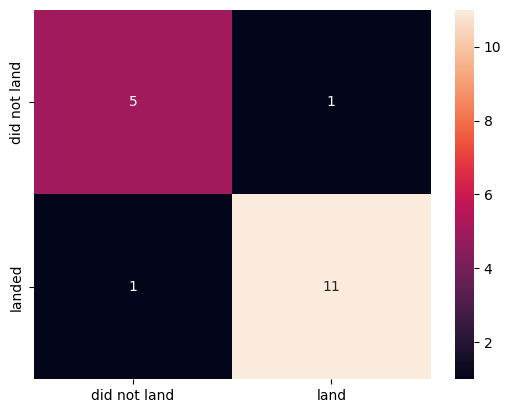

In [34]:
# Confusion Matrix
plot_confusion_matrix(y_test, tree_yhat)

In [35]:
tree_acc_score = accuracy_score(y_test, tree_yhat)
tree_acc_score

0.8888888888888888

## Task 10

Create a k nearest neighbors object then create a `GridSearchCV` object `knn_cv` with cv = 10. Fit the object to find the best parameters from the dictionary `parameters`.

In [36]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1, 2]}

In [37]:
# Instantiate the model
KNN = KNeighborsClassifier()

# Set up GridSearchCV
knn_cv = GridSearchCV(KNN,
                      param_grid = parameters,
                      cv = 10)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [38]:
knn_cv.best_params_

{'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}

In [39]:
print("Tuned hyperparameters : (best parameters)", knn_cv.best_params_)
print("\naccuracy:", knn_cv.best_score_)

Tuned hyperparameters : (best parameters) {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}

accuracy: 0.8482142857142858


## Task 11

Calculate the accuracy of knn_cv on the test data using the method `score`:

In [40]:
# Make some predicions
knn_yhat = knn_cv.predict(X_test)
knn_yhat, len(knn_yhat)

(array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64),
 18)

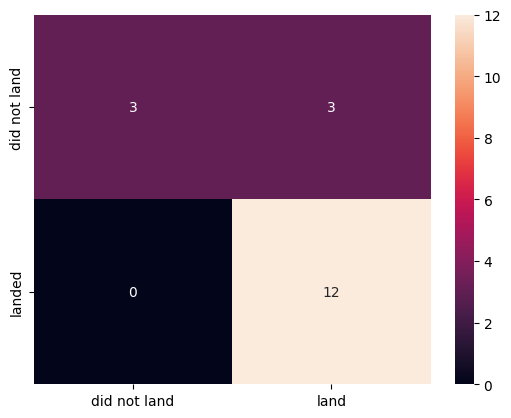

In [41]:
# Make a confusion matrix
plot_confusion_matrix(y_test, knn_yhat)

In [42]:
knn_acc_score = accuracy_score(y_test, knn_yhat)
knn_acc_score

0.8333333333333334

# Task 12

Find the method performs best:

In [43]:
best_score_dct = {'logreg_cv' : logreg_cv.best_score_,
                   'svm_cv' : svm_cv.best_score_,
                   'tree_cv' : tree_cv.best_score_,
                   'knn_cv' : knn_cv.best_score_ }
best_score_dct

{'logreg_cv': 0.8464285714285713,
 'svm_cv': 0.8482142857142856,
 'tree_cv': 0.9017857142857142,
 'knn_cv': 0.8482142857142858}

In [44]:
best_score_df = pd.DataFrame(best_score_dct,
                             index = range(1))

In [45]:
best_score_df

,logreg_cv,svm_cv,tree_cv,knn_cv
0,0.846429,0.848214,0.901786,0.848214


In [46]:
best_score_df.T

,0
logreg_cv,0.846429
svm_cv,0.848214
tree_cv,0.901786
knn_cv,0.848214


In [47]:
best_score_df = best_score_df.T
best_score_df.columns = ['best_score']
best_score_df

,best_score
logreg_cv,0.846429
svm_cv,0.848214
tree_cv,0.901786
knn_cv,0.848214


In [48]:
best_score_df.columns = ['best_score']

In [49]:
best_score_df

,best_score
logreg_cv,0.846429
svm_cv,0.848214
tree_cv,0.901786
knn_cv,0.848214


In [50]:
lst = [lr_acc_score,
        svm_cv_acc_score,
        tree_acc_score,
        knn_acc_score]

In [51]:
# Add new accuracy score column on the dataframe
best_score_df['accuracy_score'] = lst
best_score_df

,best_score,accuracy_score
logreg_cv,0.846429,0.833333
svm_cv,0.848214,0.833333
tree_cv,0.901786,0.888889
knn_cv,0.848214,0.833333


In [52]:
best_score_df.index

Index(['logreg_cv', 'svm_cv', 'tree_cv', 'knn_cv'], dtype='object')

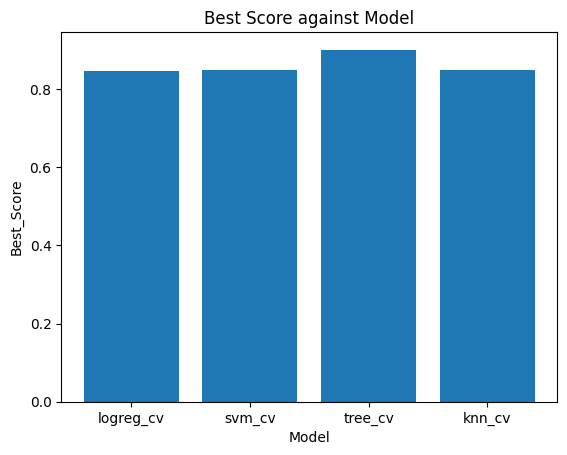

In [53]:
# Make a Bar Graph to see which is higher
import matplotlib.pyplot as plt

x_axis = best_score_df.index
y_axis = best_score_df['best_score']

plt.bar(x_axis, y_axis)
plt.title('Best Score against Model')
plt.xlabel('Model')
plt.ylabel('Best_Score')
plt.show()

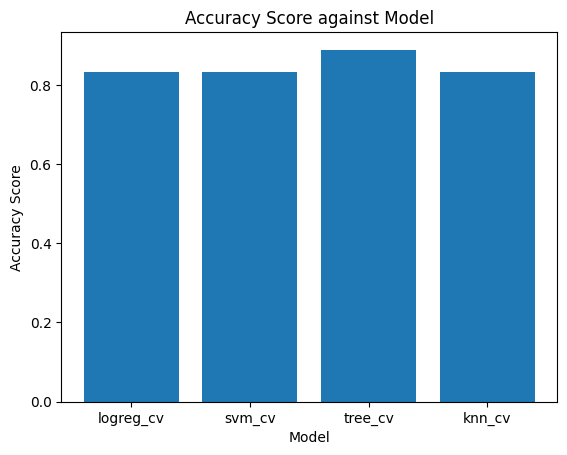

In [54]:
# Make a Bar Graph to see which is higher
import matplotlib.pyplot as plt

x_axis = best_score_df.index
y_axis = best_score_df['accuracy_score']

plt.bar(x_axis, y_axis)
plt.title('Accuracy Score against Model')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.show()

Decision Tree has a 87% model's accuracy.